In [1]:
from main import ProcessAudio
from main import *

In [2]:
e5, sr = librosa.load("mp3 Notes/e5.mp3", sr=44100)
d4, sr = librosa.load("mp3 Notes/d4.mp3", sr=44100)
mix = e5[:len(d4)]+ d4
print(mix.shape)


(28685,)


In [3]:
example = ProcessAudio("recordings/download.wav", 261.6)
example.import_numpy(mix)
example.generate_M_K_w([293.66, 659.25], [15,15])


Windows: (74, 182016)
Windows: (13, 28685)
Recording File: recordings/download.wav 
Sampling Frequency: 44100 
Samples: 0 to 28685 (28685) 
Time: 0.00s to 0.65s (0.65s) 



In [21]:
# print(example.I, example._window_starts)
w = example.w
x = w.flatten()
print(x)

[ 293.66  587.32  880.98 1174.64 1468.3  1761.96 2055.62 2349.28 2642.94
 2936.6  3230.26 3523.92 3817.58 4111.24 4404.9   659.25 1318.5  1977.75
 2637.   3296.25 3955.5  4614.75 5274.   5933.25 6592.5  7251.75 7911.
 8570.25 9229.5  9888.75]


[15, 15]


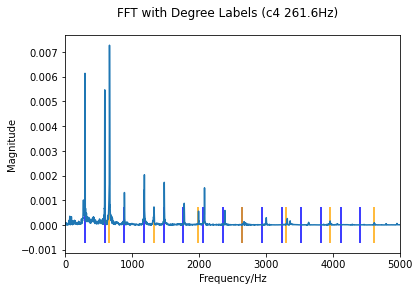

In [5]:
print(example.M)
example.fft_plot()

100%|██████████| 13/13 [00:04<00:00,  2.61it/s]


(28685, 780)


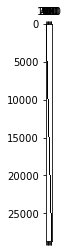

In [6]:
D1 = example.generate_D()
print(D1.shape)
plt.spy(D1)
plt.show()

In [7]:
Audio(data=example.samples, rate=example.rate)

In [11]:
piano = AnalyseAudio(D1, example.samples,0,0,0)
piano.MLE()

resynth = piano.resynth_sound()

In [12]:
Audio(data = resynth, rate = 44100)

In [13]:
data1 = VisualiseAudio(example.samples)

In [14]:
def colourlines(K, w):
    colours = ["blue","orange", "green", "red", "pink"]

    colours_arg = []
    for i, order in enumerate(K):
        # i=0, note=15
        for partial in range(order): 
            colours_arg.append(colours[i])
    return colours_arg

    


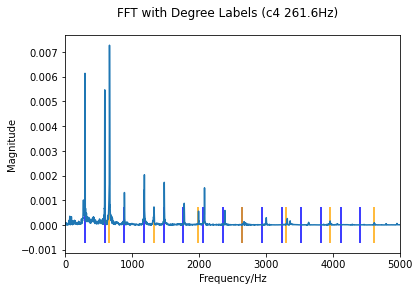

Windows: (13, 28685)
Recording File: recordings/download.wav 
Sampling Frequency: 44100 
Samples: 0 to 28685 (28685) 
Time: 0.00s to 0.65s (0.65s) 



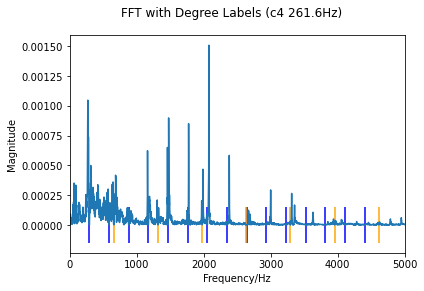

In [15]:
example.fft_plot()

error = example.samples - resynth
example.import_numpy(error)
example.fft_plot()

In [16]:
p = lambda k: poisson.pmf(k,mu)
print(p(10))

NameError: name 'poisson' is not defined

In [ ]:
def frequency_priors():
    # Returns array of equal tempered note frequencies
    
    frequencies = np.zeros(89)
    for f in range(89):
        frequencies[f] = 440*(2**(1/12))**(f-49)
        frequencies[f] = 440*2**((np.round_(12*np.log2(frequencies[f]/440)))/12)
    return frequencies

In [ ]:
freqs = frequency_priors()
print(freqs[28:40][::2])

[130.81278265 146.83238396 164.81377846 184.99721136 207.65234879
 233.08188076]


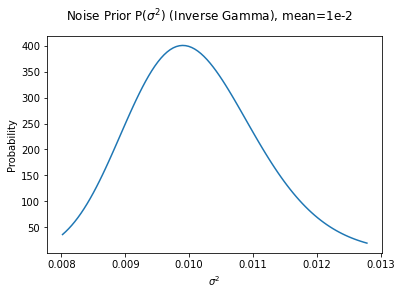

In [47]:
from scipy.stats import norm, multivariate_normal, poisson,invgamma


fig, ax = plt.subplots(1, 1)
mean = 1e-2
a = 1/mean
x = np.linspace(invgamma.ppf(0.01, a),
                invgamma.ppf(0.99, a), 100)
ax.plot(x, invgamma.pdf(x, a))
fig.suptitle("Noise Prior P($\sigma^2$) (Inverse Gamma), mean=1e-2")
plt.xlabel("$\sigma^2$")
plt.ylabel("Probability")
plt.show()


0.00042607317698449565
